# LUT Verificaton

In [2]:
import os 
import sys
import matplotlib.pyplot as plt
import ConvergenceLibrary 
from ConvergenceLibrary import RandomSamples, PRGrid, SU2_InterpolatedData
from ConvergenceLibrary import SciPy_InterpolatedData, RefinementLevel, plot_median_errors

reload(ConvergenceLibrary)
from shutil import copyfile
%matplotlib inline
#%matplotlib notebook

## Select which LUT file to use and load samples

In [3]:
PR_files = os.listdir('TableLibrary')
PR_files.sort()
levels = len(PR_files);
cases = ["rhoe","PT", "Prho","rhoT","Ps","hs"]
Refinement_Levels = [RefinementLevel(PR_files[i], cases) for i in range(levels)]
Random_Samples = RandomSamples('random.dat')

Loading random verification data
DONE Loading random verification data
Preparing input files...
DONE Preparing input files...


In [2]:
400*400

160000

# Run the verification for each refinement level

In [5]:

for level in Refinement_Levels:
    output_files = ["rhoe_out.dat","PT_out.dat", "Prho_out.dat","rhoT_out.dat","Ps_out.dat","hs_out.dat"]
    for f in output_files:
        try:
             os.remove(f)
        except OSError:
             pass

    #Use the thermotable related to the desired refinement level
    copyfile('TableLibrary/'+level.filename, 'TableFile.rgp')  
    print 'Mesh file:',  level.filename;
    #Recompile if necessary
    os.system('make Debug/makefile');
    print 'Running...'
    #Run and save the log
    os.system('Debug/TableReader>log');
    print 'DONE'
    level.load_mesh();
    level.load_random_samples(Random_Samples)
    level.load_results_SU2();
    level.load_results_SciPy('linear');
    

Mesh file: 100100.rgp
Running...
DONE
P-RHO dimensions: 100 by 100
SciPy Interpolating  rhoe
SciPy Interpolating  PT
SciPy Interpolating  Prho
SciPy Interpolating  rhoT
SciPy Interpolating  Ps
SciPy Interpolating  hs
Mesh file: 140140.rgp
Running...
DONE
P-RHO dimensions: 140 by 140
SciPy Interpolating  rhoe
SciPy Interpolating  PT
SciPy Interpolating  Prho
SciPy Interpolating  rhoT
SciPy Interpolating  Ps


KeyboardInterrupt: 

In [50]:
import os 
import sys
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg
import ConvergenceLibrary 
from ConvergenceLibrary import RandomSamples, PRGrid, SU2_InterpolatedData
from ConvergenceLibrary import SciPy_InterpolatedData, RefinementLevel, plot_median_errors
reload(ConvergenceLibrary)
from shutil import copyfile
%matplotlib inline
#%matplotlib notebook

# Plot the results 

Analyzing median error on:  rhoe


AttributeError: 'dict' object has no attribute 'D_dim'

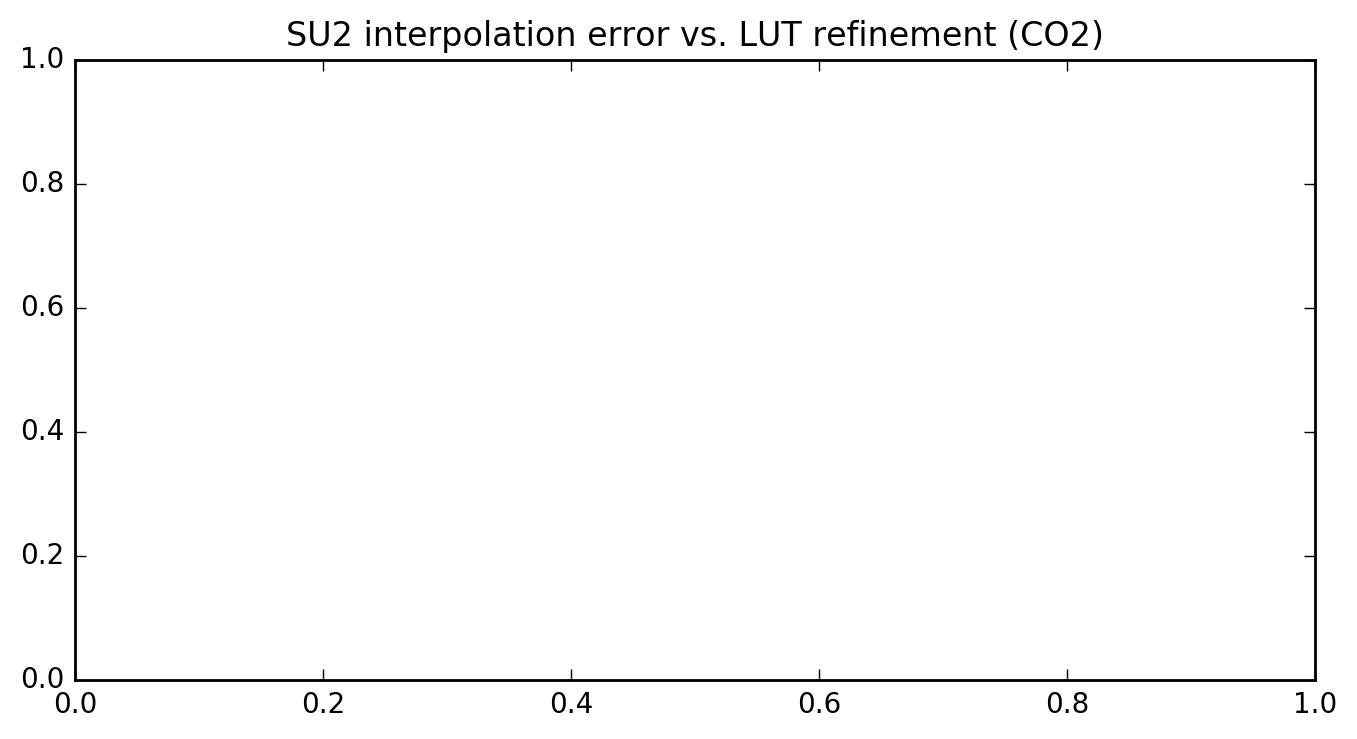

In [4]:
plt.rc("savefig", dpi=200)
plt.figure(figsize=(8,4))
plt.title('SU2 interpolation error vs. LUT refinement (CO2)')
plot_median_errors(Refinement_Levels)
plt.legend(loc='best')

In [77]:
str(sp.string_(sp.around(3.155555,2))[0:4])

'3.16'

## RHOE

Error max SU2 8.63821361591e-05
Error max SciPy 0.0286236397521


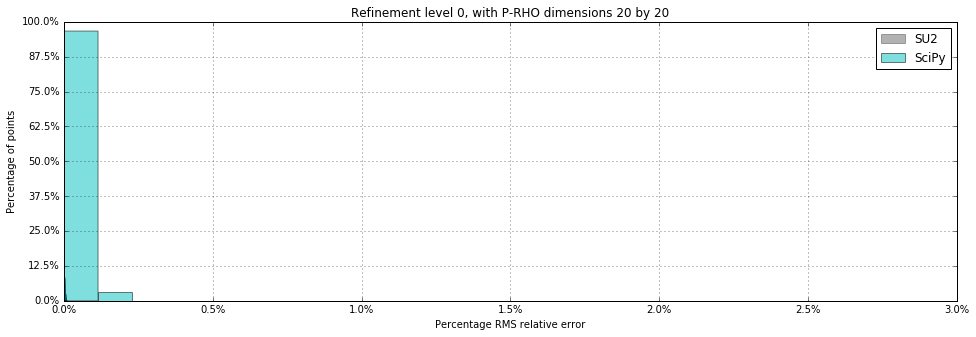

Error max SU2 2.11406209437e-05
Error max SciPy 0.0195155182268


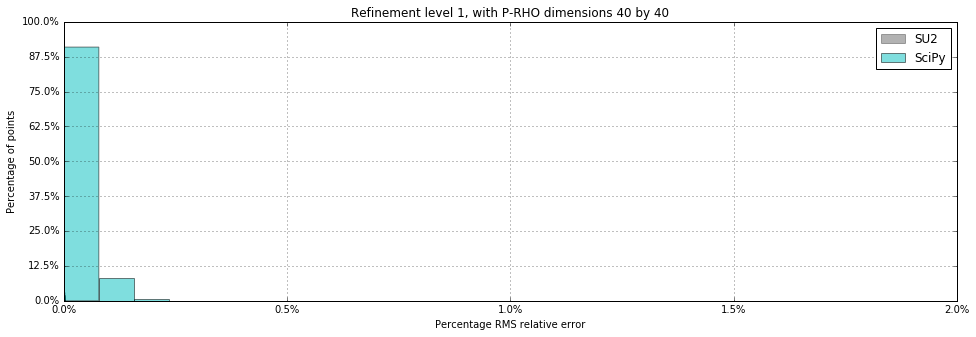

Error max SU2 1.13821926894e-05
Error max SciPy 0.0205781868387


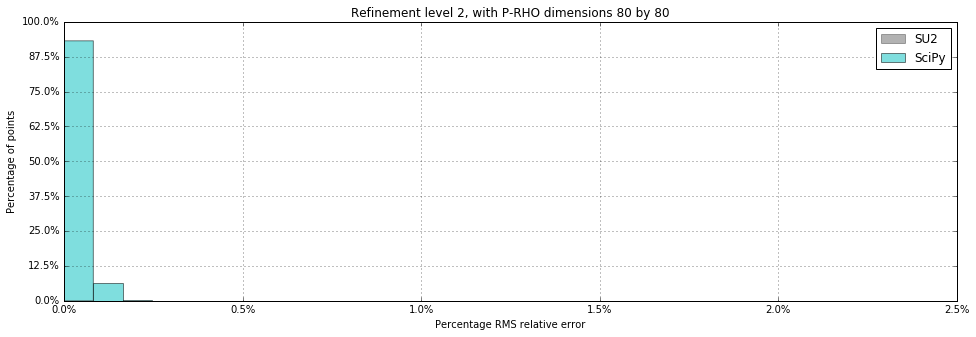

In [13]:
%matplotlib inline
reload(ConvergenceLibrary)#.plot_median_errors)
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('rhoe')
    plt.show()


## PRHO

Error max SU2 0.000230989365575
Error max SciPy 0.000300694662462


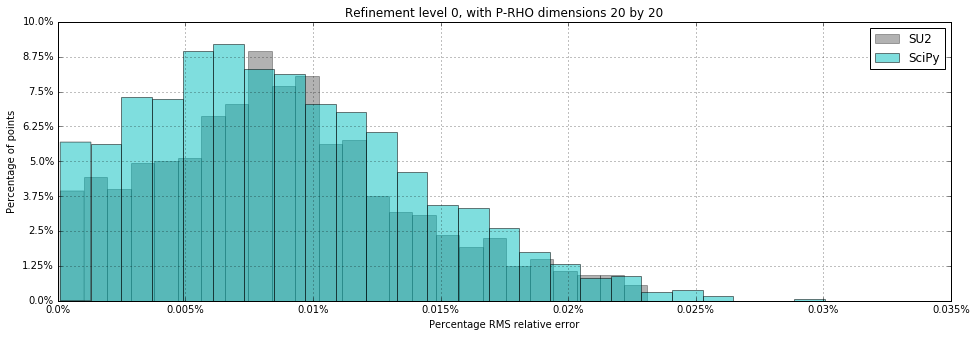

Error max SU2 5.58832330206e-05
Error max SciPy 6.32116858406e-05


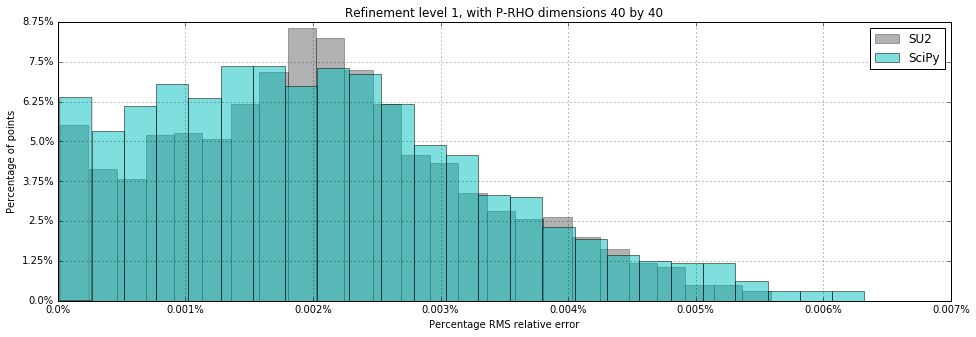

Error max SU2 1.46655684406e-05
Error max SciPy 0.000163400109505


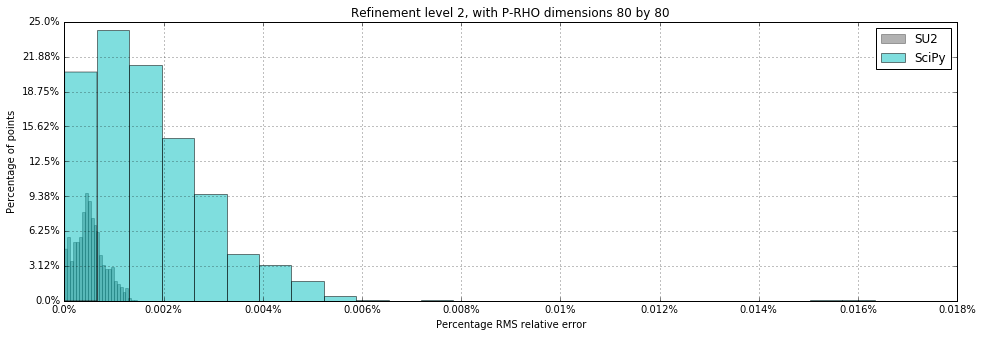

In [14]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('Prho')
    plt.show()

## RHOT

Error max SU2 7.07808677938e-05
Error max SciPy 0.00338809934069


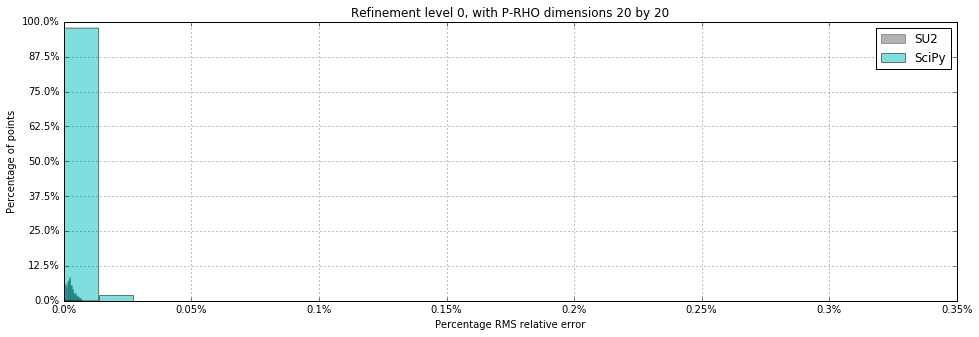

Error max SU2 3.10814952628e-05
Error max SciPy 0.00185536982767


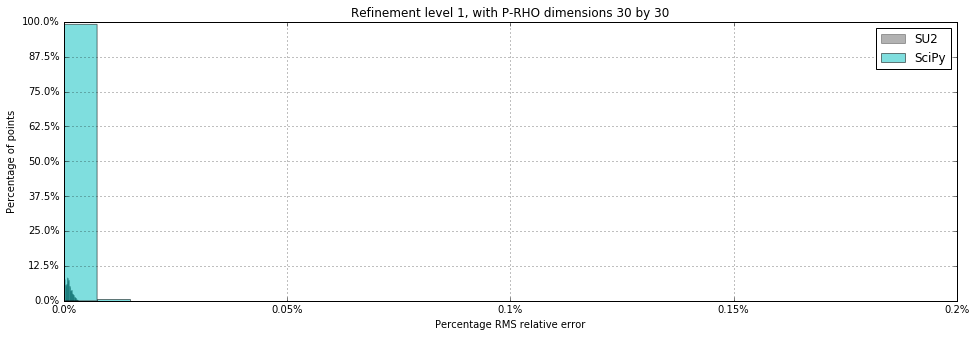

Error max SU2 2.05174257959e-05
Error max SciPy 0.00165724865784


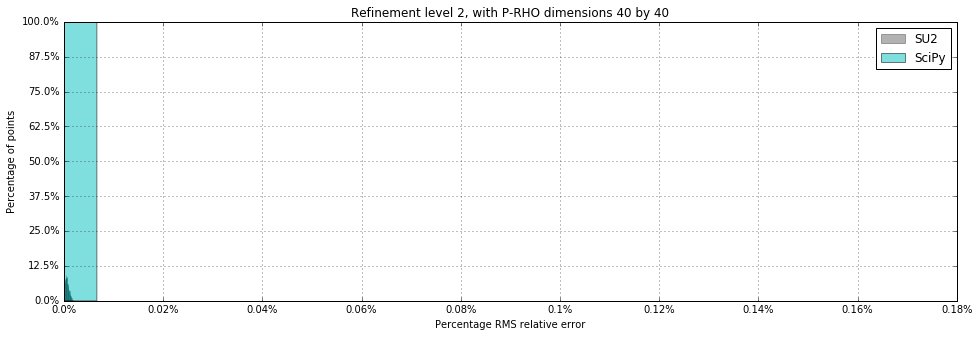

Error max SU2 1.12683016227e-05
Error max SciPy 0.00109769248024


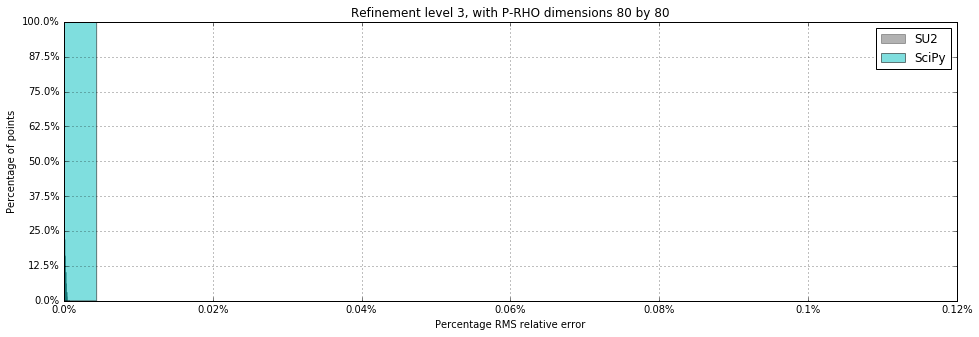

In [8]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('rhoT')
    plt.show()

## PS

Error max SU2 0.000130897055318
Error max SciPy 0.000127939176511


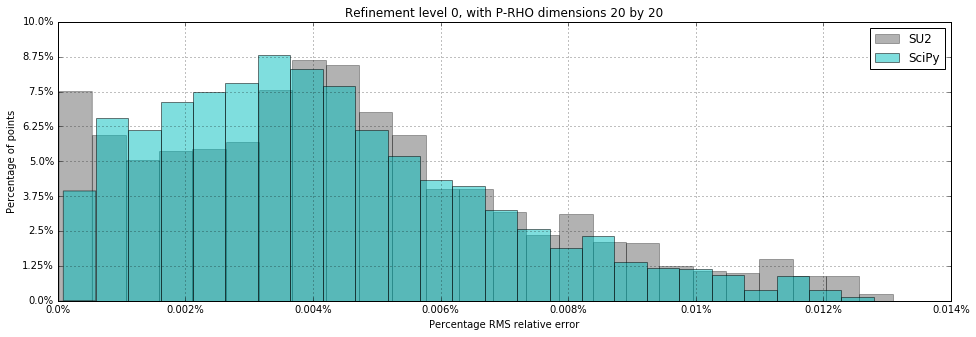

Error max SU2 5.74558448825e-05
Error max SciPy 5.66137784729e-05


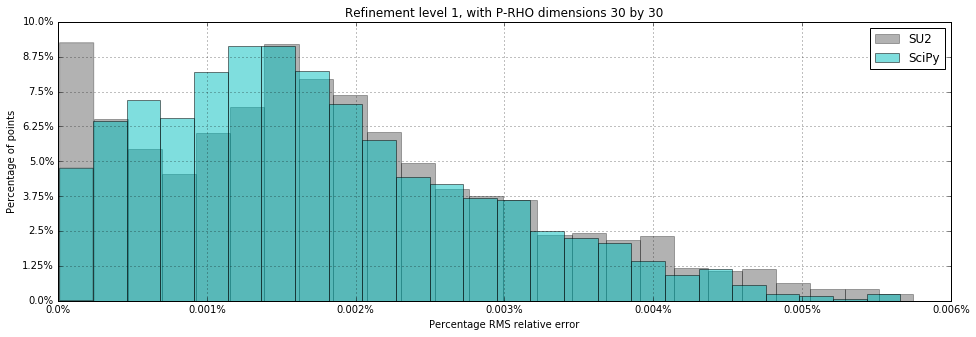

Error max SU2 3.16307345271e-05
Error max SciPy 3.16035321027e-05


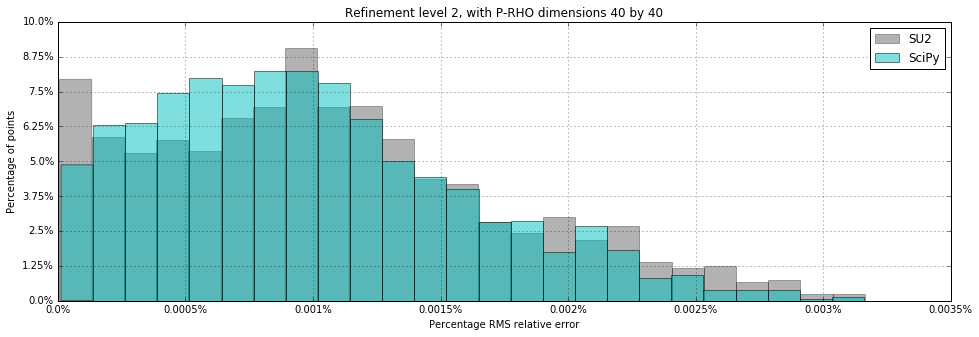

Error max SU2 1.1528114612e-05
Error max SciPy 1.13730322268e-05


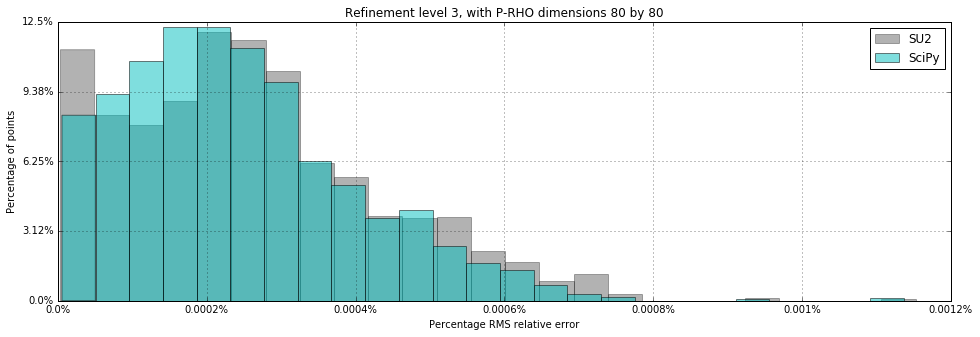

In [9]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('Ps')
    plt.show()

## HS

Error max SU2 0.000382834464634
Error max SciPy 0.0335008517148


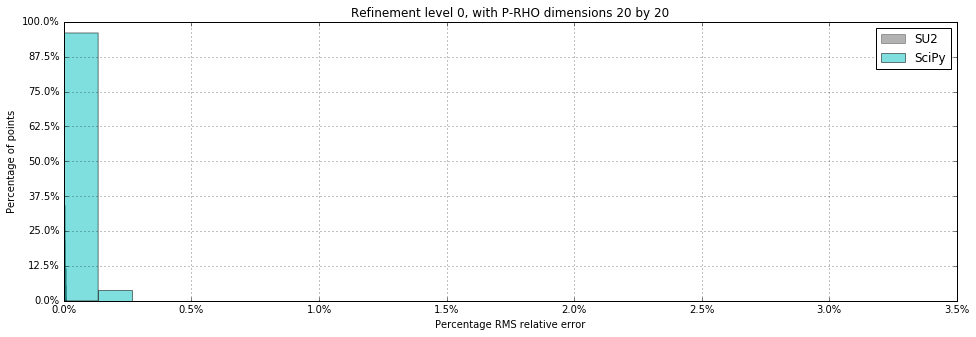

ValueError: max must be larger than min in range parameter.

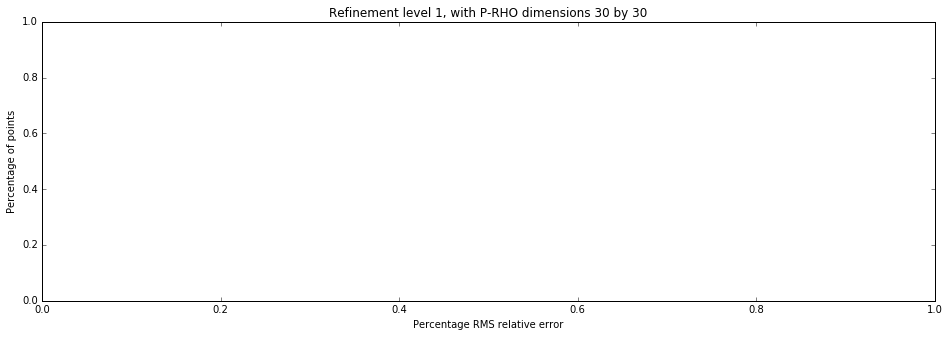

In [10]:
%matplotlib inline
for level in Refinement_Levels:
    plt.figure(figsize=(16,5))
    plt.title('Refinement level %i, with P-RHO dimensions %i by %i'\
              %(Refinement_Levels.index(level), level.LUT.P_dim,level.LUT.D_dim ))
    level.plot_hist_compare('hs')
    plt.show()